In [1]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to select and upload the file


Saving amazon_review.csv to amazon_review.csv


In [2]:
!pip install textblob
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Dataset Shape: (4915, 12)

First 5 Rows:
        reviewerID        asin  reviewerName helpful  \
0  A3SBTW3WS4IQSN  B007WTAJTO           NaN  [0, 0]   
1  A18K1ODH1I2MVB  B007WTAJTO          0mie  [0, 0]   
2  A2FII3I2MBMUIA  B007WTAJTO           1K3  [0, 0]   
3   A3H99DFEG68SR  B007WTAJTO           1m2  [0, 0]   
4  A375ZM4U047O79  B007WTAJTO  2&amp;1/2Men  [0, 0]   

                                          reviewText  overall  \
0                                         No issues.      4.0   
1  Purchased this for my device, it worked as adv...      5.0   
2  it works as expected. I should have sprung for...      4.0   
3  This think has worked out great.Had a diff. br...      5.0   
4  Bought it with Retail Packaging, arrived legit...      5.0   

                                  summary  unixReviewTime  reviewTime  \
0                              Four Stars      1406073600  2014-07-23   
1                           MOAR SPACE!!!      1382659200  2013-10-25   
2               n

/tmp/ipython-input-2434529194.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['sentiment'] = sample_df['reviewText'].apply(get_sentiment)



Sample Reviews with Sentiment:
                                           reviewText  overall sentiment
0                                         No issues.      4.0   Neutral
1  Purchased this for my device, it worked as adv...      5.0  Positive
2  it works as expected. I should have sprung for...      4.0  Positive
3  This think has worked out great.Had a diff. br...      5.0   Neutral
4  Bought it with Retail Packaging, arrived legit...      5.0  Positive
5  It's mini storage.  It doesn't do anything els...      5.0  Negative
6  I have it in my phone and it never skips a bea...      5.0  Positive
7  It's hard to believe how affordable digital ha...      5.0  Positive
8  Works in a HTC Rezound.  Was running short of ...      5.0  Positive
9  in my galaxy s4, super fast card, and am total...      5.0  Positive


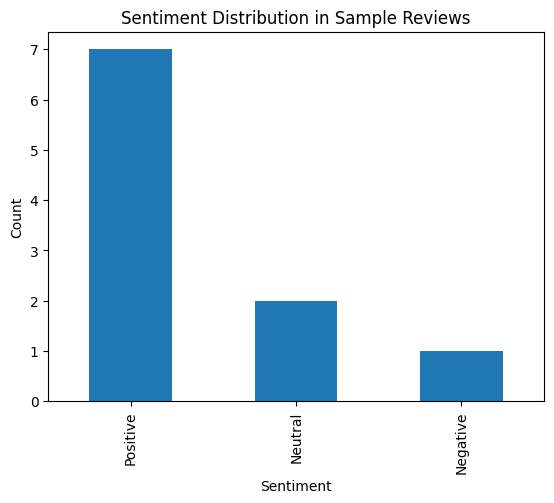

In [3]:
# Import Libraries
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Load the Dataset
df = pd.read_csv('amazon_review.csv')

# Display basic info
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:\n", df.head())

# Basic Data Preparation

df = df[['reviewText', 'overall']].dropna()


sample_df = df.head(10)

# Perform Simple Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

sample_df['sentiment'] = sample_df['reviewText'].apply(get_sentiment)

# Display results
print("\nSample Reviews with Sentiment:\n", sample_df[['reviewText', 'overall', 'sentiment']])

# Visualize Sentiment Distribution
sample_df['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution in Sample Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
